In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

**General information about the dataset**

In [2]:
df = pd.read_csv('World University Rankings 2023.csv', encoding='utf-8')
df.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


In [3]:
df.tail()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
2336,-,University of the West of Scotland,NaN,NaN,NaN,NaN,NaN,34.0–39.2,24.1,15.5,61.5,37.9,76.8
2337,-,University of Windsor,NaN,NaN,NaN,NaN,NaN,34.0–39.2,35.1,29.4,34.5,44.2,88.7
2338,-,University of Wolverhampton,NaN,NaN,NaN,NaN,NaN,34.0–39.2,18.2,14.3,68.8,37.3,72.0
2339,-,University of Wuppertal,NaN,NaN,NaN,NaN,NaN,34.0–39.2,26.4,26.7,52.8,52.1,47.6
2340,-,Xi’an Jiaotong-Liverpool University,NaN,NaN,NaN,NaN,NaN,34.0–39.2,17.8,14.8,68.2,38.2,72.4


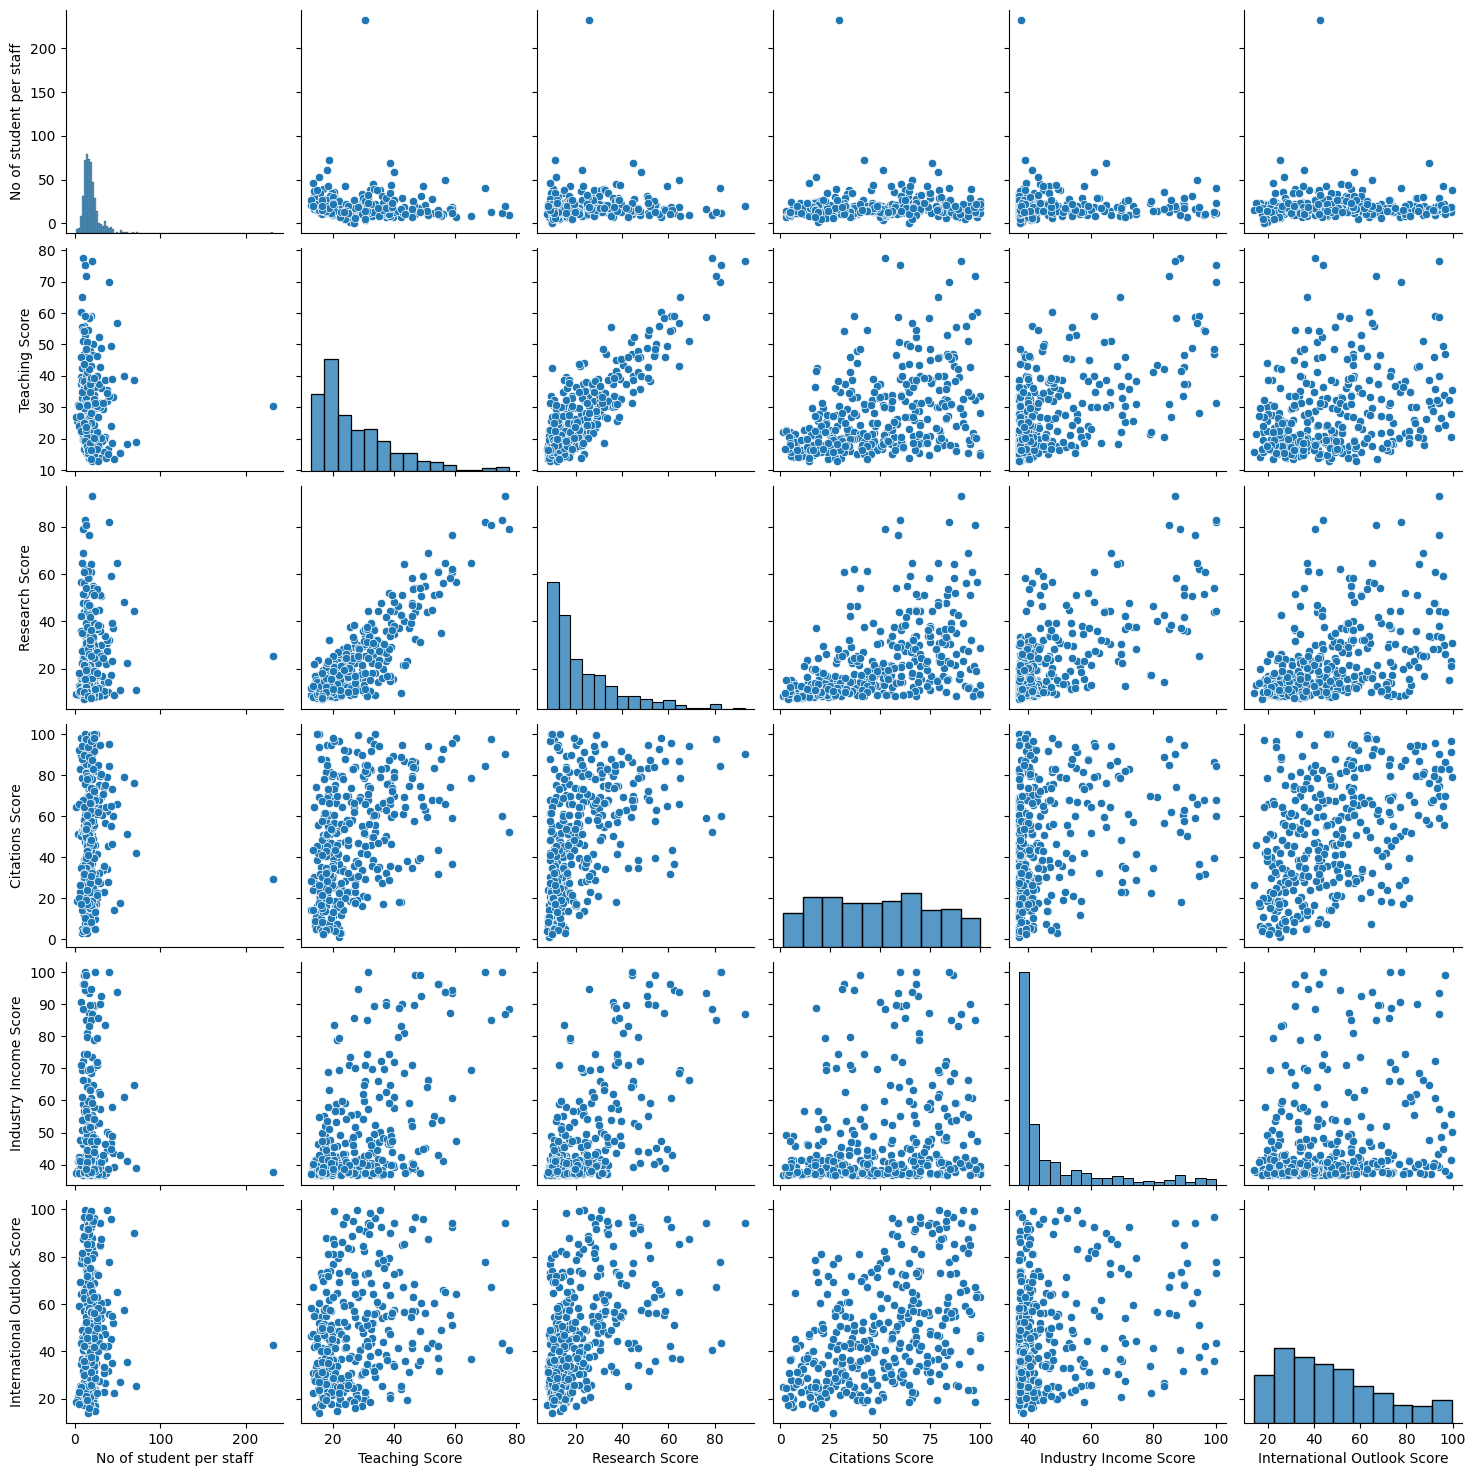

In [4]:
sns.pairplot(df.sample(frac=0.2, random_state=42))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2341 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   object 
 4   No of student per staff      2208 non-null   float64
 5   International Student        2209 non-null   object 
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                1799 non-null   object 
 8   Teaching Score               1799 non-null   float64
 9   Research Score               1799 non-null   float64
 10  Citations Score              1799 non-null   float64
 11  Industry Income Score        1799 non-null   float64
 12  International Outlook Score  1799 non-null   float64
dtypes: float64(6), obj

In [6]:
df.describe()

,No of student per staff,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
count,2208.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,19.000408,27.018010,23.016898,48.495887,47.104558,46.880378
std,12.132224,13.282243,16.763819,27.967185,15.093682,22.582401
min,0.400000,11.600000,7.400000,0.800000,36.900000,14.100000
25%,12.600000,18.000000,11.300000,23.100000,37.800000,27.900000
50%,16.600000,22.700000,17.000000,47.200000,40.500000,42.100000
75%,22.200000,31.850000,28.900000,72.350000,48.300000,62.100000
max,232.200000,94.800000,99.700000,100.000000,100.000000,99.700000


In [7]:
df.shape

(2341, 13)

**Data cleaning**

In [8]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

,0
Industry Income Score,542
Research Score,542
Citations Score,542
OverAll Score,542
Teaching Score,542
International Outlook Score,542
Location,294
Female:Male Ratio,213
No of student per staff,133
No of student,132


Number of missing values ​​in dataset columns

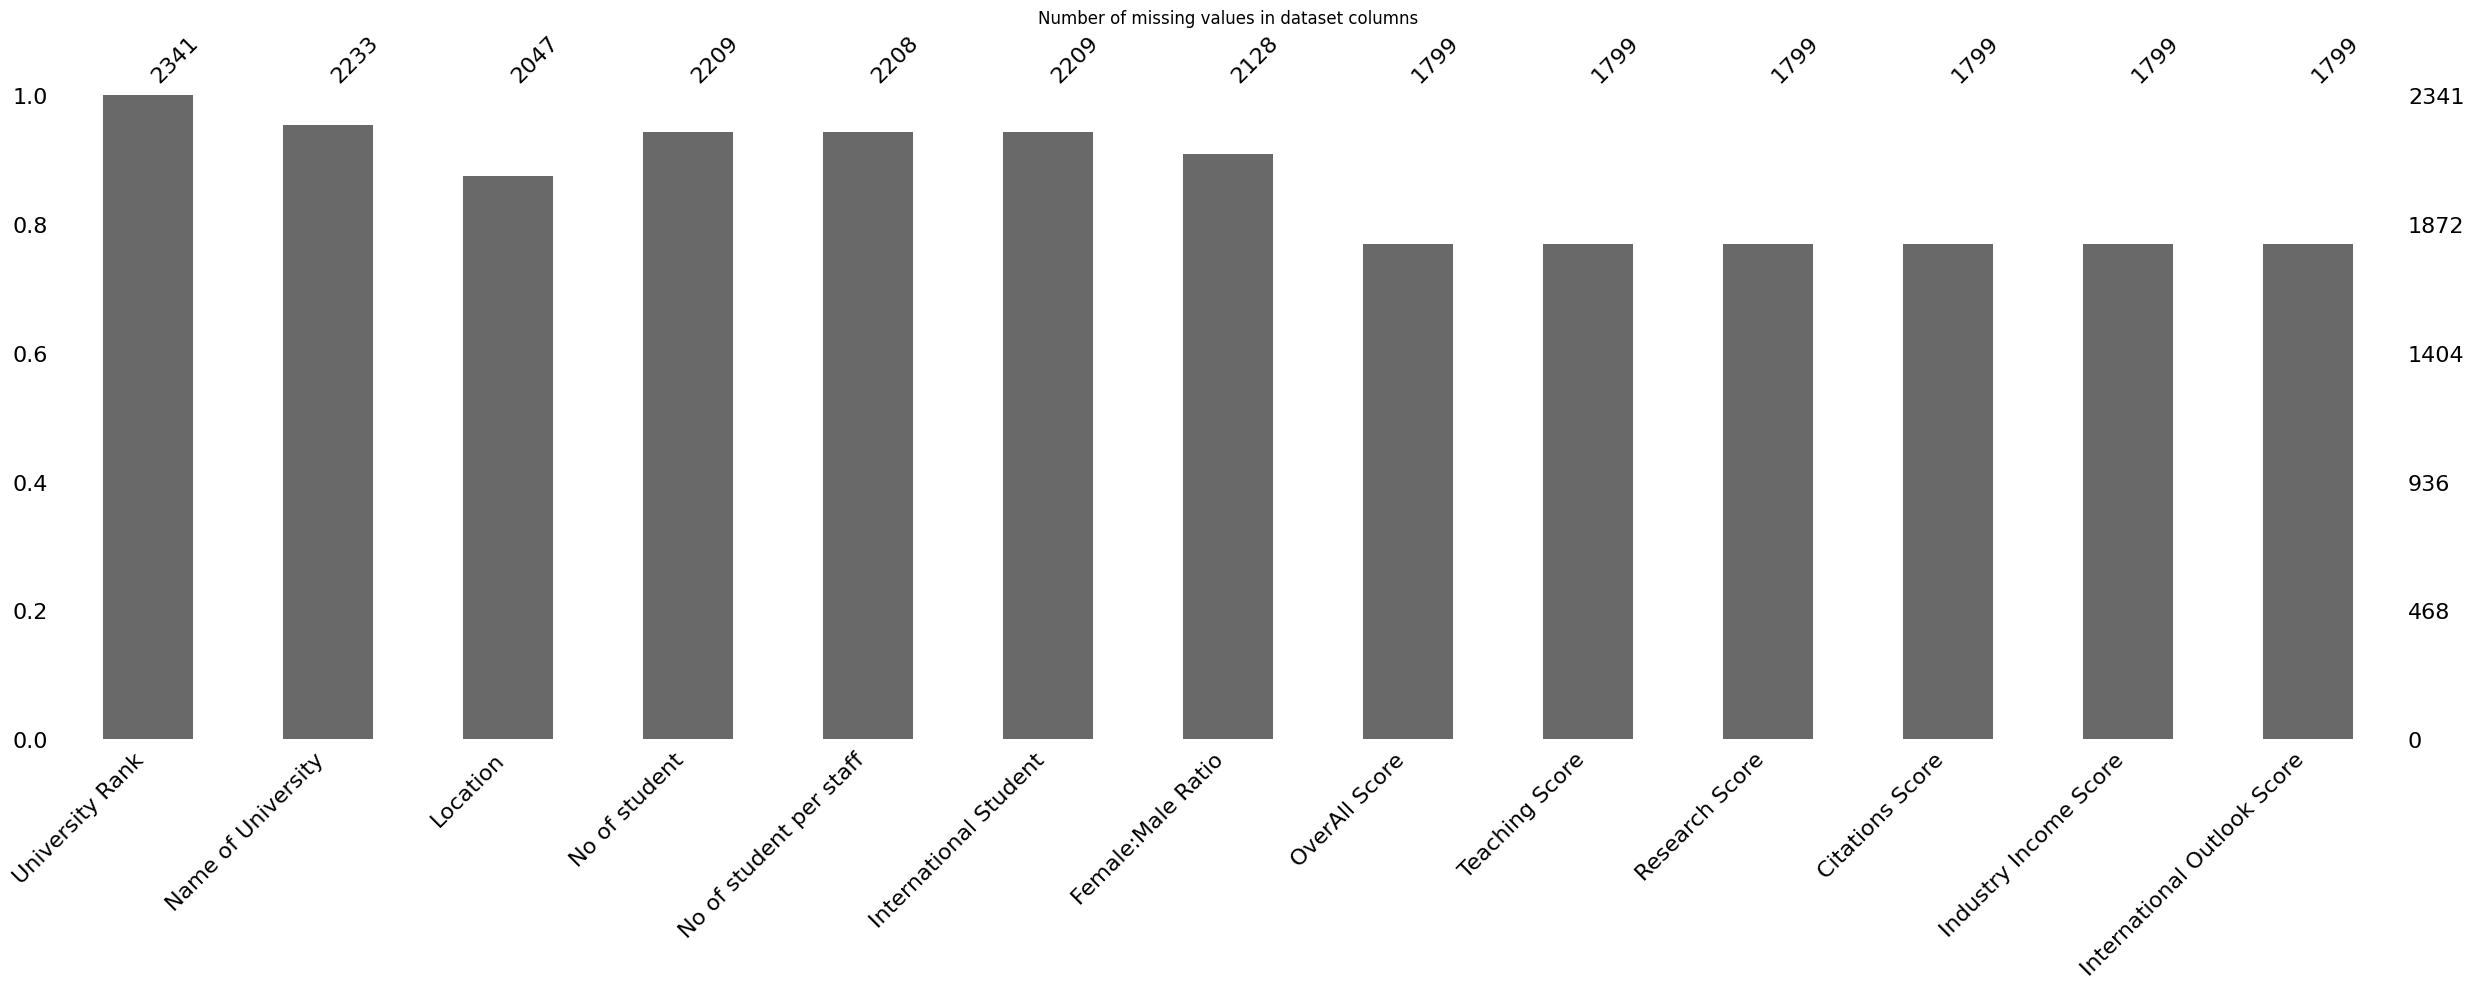

In [9]:
plt.figure(figsize=(12, 6))
msno.bar(df)
plt.title("Number of missing values ​​in dataset columns")
plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

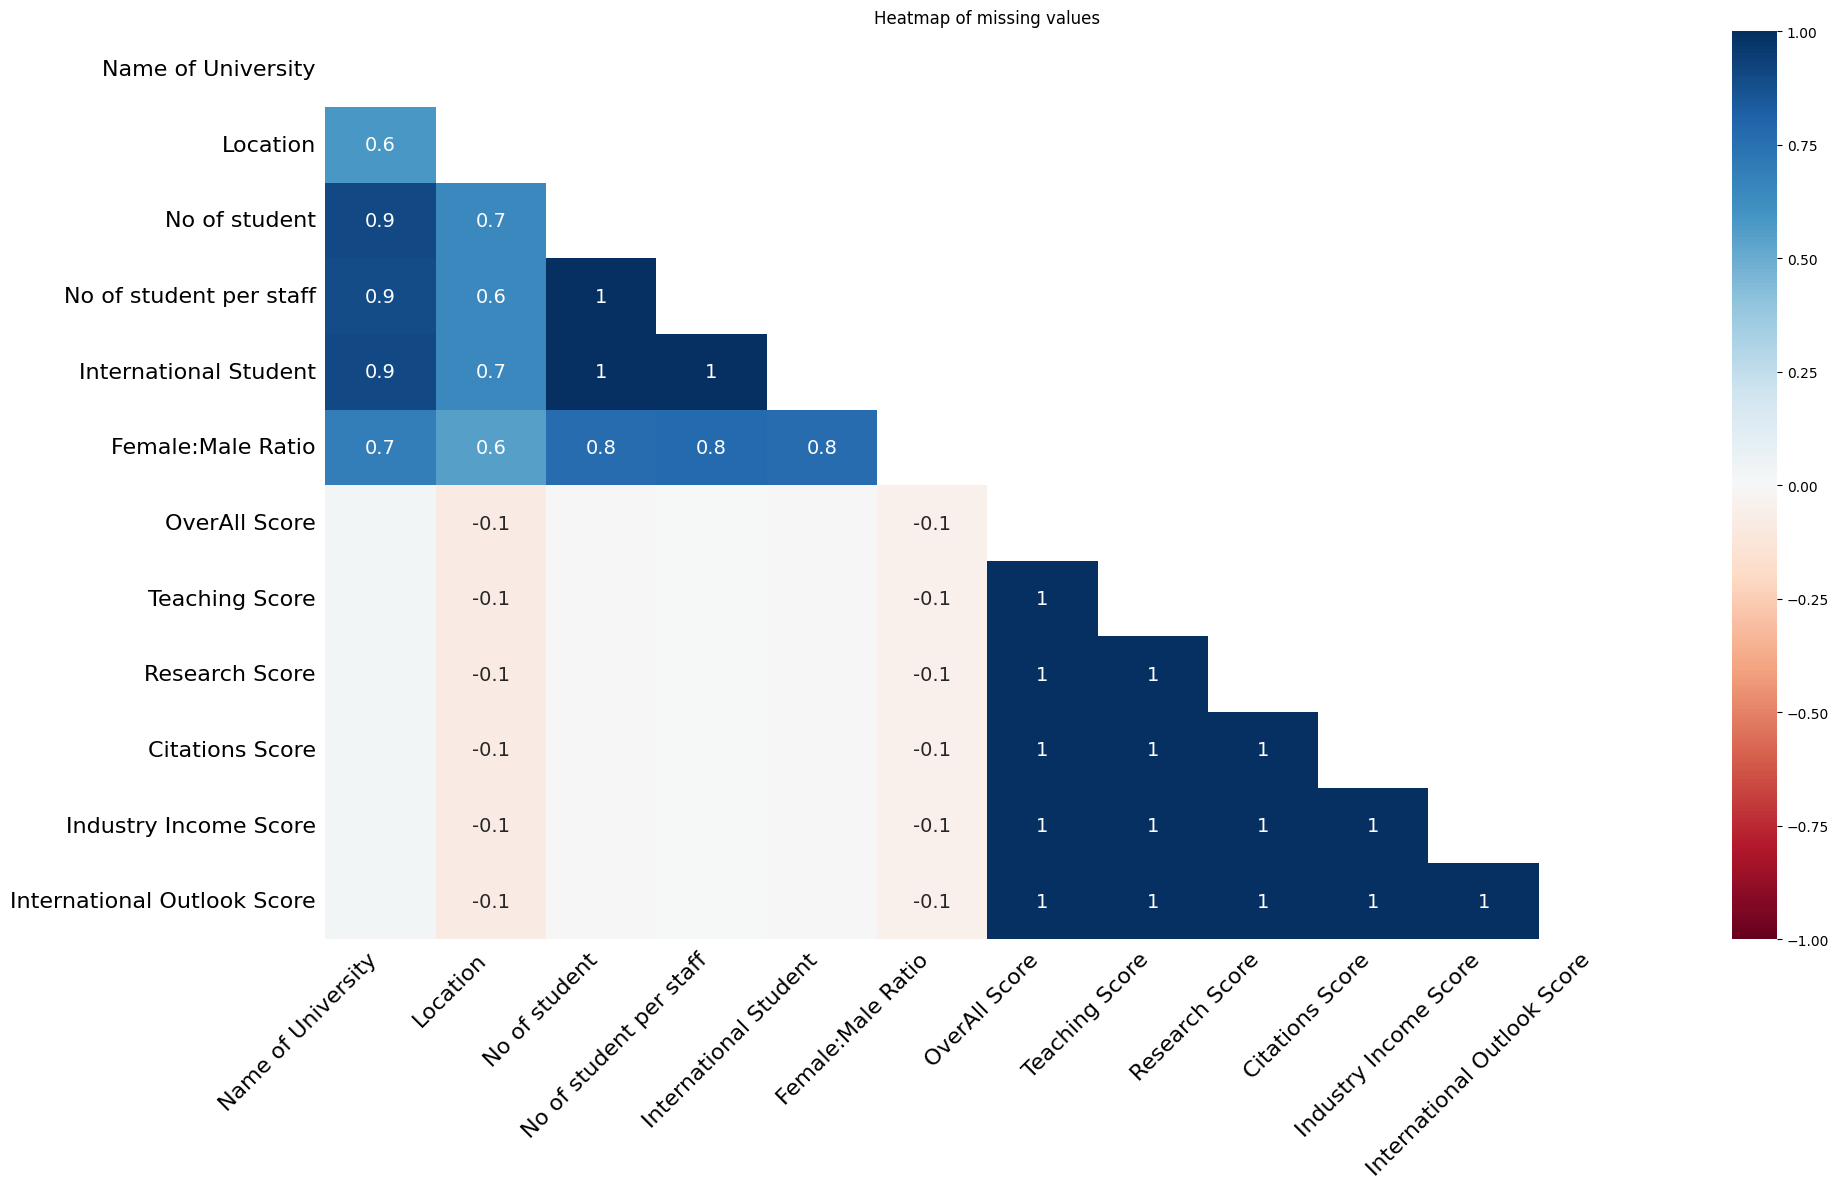

In [10]:
plt.figure(figsize=(8, 4))
msno.heatmap(df)
plt.title("Heatmap of missing values")
plt.tight_layout()
plt.show()

Removing empty values ​​where there are no university names. In my opinion, it makes no sense to analyze such data, because the point is to work with specific universities, and we don't know what we are evaluating.

In [11]:
df = df[df['Name of University'].notna() & (df['Name of University'].str.strip() != '')]
df.shape

(2233, 13)

In [12]:
df.tail(50)

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
2183,Reporter,Varna University of Management,Bulgaria,618,19.3,33%,48 : 52,NaN,NaN,NaN,NaN,NaN,NaN
2184,Reporter,"Veritas University, Abuja",Nigeria,"3,291",13.2,2%,56 : 44,NaN,NaN,NaN,NaN,NaN,NaN
2185,Reporter,University of Veterinary Medicine and Pharmacy...,Slovakia,"1,717",7.2,40%,83 : 17,NaN,NaN,NaN,NaN,NaN,NaN
2186,Reporter,Vila Velha University,Brazil,"4,902",18.5,1%,59 : 41,NaN,NaN,NaN,NaN,NaN,NaN
2187,Reporter,Virtual University of Tunis,Tunisia,"2,048",43.6,1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2188,Reporter,Visayas State University,Philippines,"6,163",13.8,0%,59 : 41,NaN,NaN,NaN,NaN,NaN,NaN
2189,Reporter,University of Wales Trinity Saint David,United Kingdom,"9,280",19.7,25%,59 : 41,NaN,NaN,NaN,NaN,NaN,NaN
2190,Reporter,​Wellspring University,Nigeria,313,12.5,0%,67 : 33,NaN,NaN,NaN,NaN,NaN,NaN
2191,Reporter,Western Caspian University,Azerbaijan,"3,245",7.7,5%,59 : 41,NaN,NaN,NaN,NaN,NaN,NaN
2192,Reporter,University of West London,United Kingdom,"9,510",15.9,42%,60 : 40,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
duplicates = df.duplicated().sum()
duplicates


np.int64(0)

Separating Female and Male into separate columns because it's not convenient

In [14]:
ratios = df['Female:Male Ratio'].str.extract(r'(\d+)\s*:\s*(\d+)')

df['Female'] = pd.to_numeric(ratios[0], errors='coerce')
df['Male'] = pd.to_numeric(ratios[1], errors='coerce')



In [15]:
df.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female,Male
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2,48.0,52.0
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5,50.0,50.0
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8,47.0,53.0
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8,46.0,54.0
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3,40.0,60.0


Transforming the OverAll Score feature, because it has values ​​in a range, I will calculate the average and use the average value in the future.

In [16]:
def extract_mean_range(value):
    try:
        parts = value.replace('–', '-').split('-')
        parts = [float(p) for p in parts]
        return sum(parts) / len(parts)
    except:
        return np.nan

df['OverAll Score'] = df['OverAll Score'].astype(str).apply(extract_mean_range)

Conversion to numeric variables

In [17]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')
df['No of student'] = df['No of student'].str.replace(',', '')
df['No of student'] = pd.to_numeric(df['No of student'], errors='coerce')
df['International Student'] = df['International Student'].str.replace('%', '')
df['International Student'] = pd.to_numeric(df['International Student'], errors='coerce') / 100
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2340
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2233 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   float64
 4   No of student per staff      2208 non-null   float64
 5   International Student        2206 non-null   float64
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                1721 non-null   float64
 8   Teaching Score               1721 non-null   float64
 9   Research Score               1721 non-null   float64
 10  Citations Score              1721 non-null   float64
 11  Industry Income Score        1721 non-null   float64
 12  International Outlook Score  1721 non-null   float64
 13  Female                 

<ipython-input-17-882811700264>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [18]:
df.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female,Male
0,1,University of Oxford,United Kingdom,20965.0,10.6,0.42,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2,48.0,52.0
1,2,Harvard University,United States,21887.0,9.6,0.25,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5,50.0,50.0
2,3,University of Cambridge,United Kingdom,20185.0,11.3,0.39,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8,47.0,53.0
3,3,Stanford University,United States,16164.0,7.1,0.24,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8,46.0,54.0
4,5,Massachusetts Institute of Technology,United States,11415.0,8.2,0.33,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3,40.0,60.0


In [19]:
df.tail()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female,Male
2336,-,University of the West of Scotland,NaN,NaN,NaN,NaN,NaN,36.6,24.1,15.5,61.5,37.9,76.8,NaN,NaN
2337,-,University of Windsor,NaN,NaN,NaN,NaN,NaN,36.6,35.1,29.4,34.5,44.2,88.7,NaN,NaN
2338,-,University of Wolverhampton,NaN,NaN,NaN,NaN,NaN,36.6,18.2,14.3,68.8,37.3,72.0,NaN,NaN
2339,-,University of Wuppertal,NaN,NaN,NaN,NaN,NaN,36.6,26.4,26.7,52.8,52.1,47.6,NaN,NaN
2340,-,Xi’an Jiaotong-Liverpool University,NaN,NaN,NaN,NaN,NaN,36.6,17.8,14.8,68.2,38.2,72.4,NaN,NaN


**Distribution analysis**

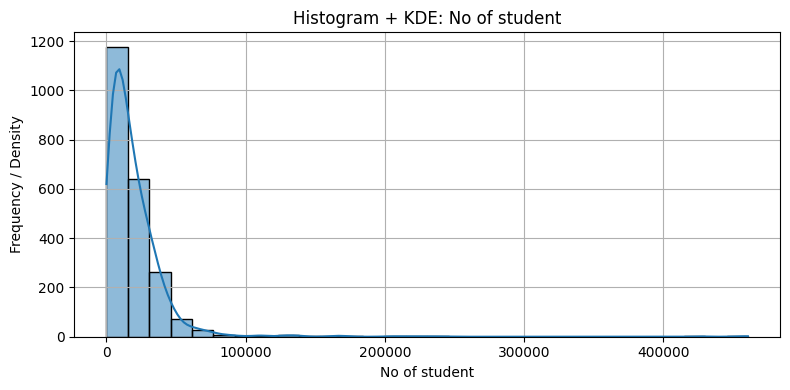

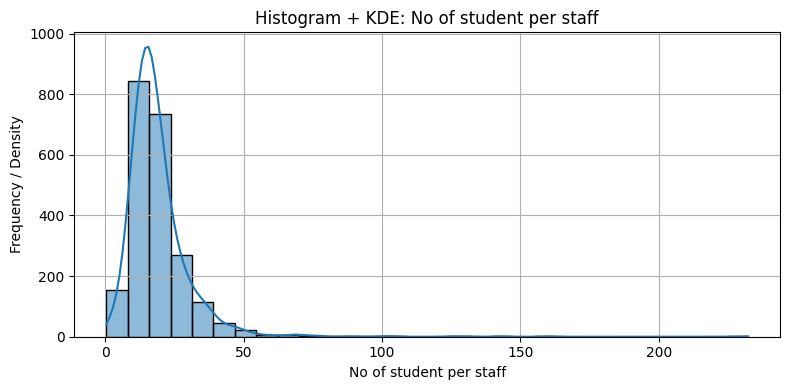

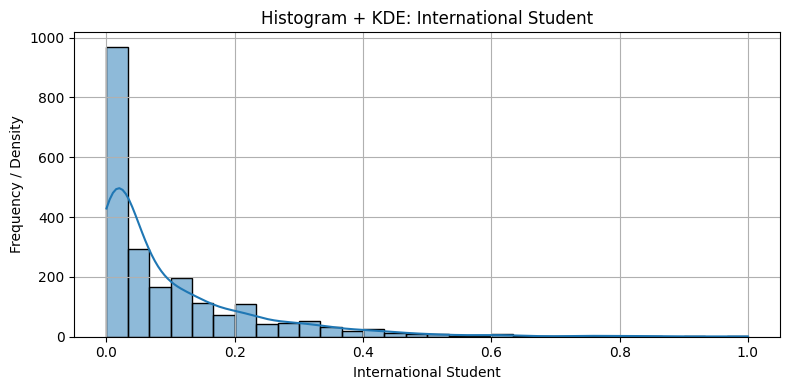

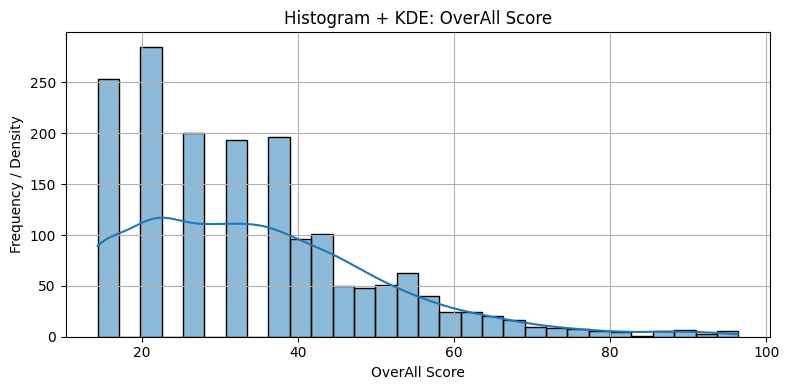

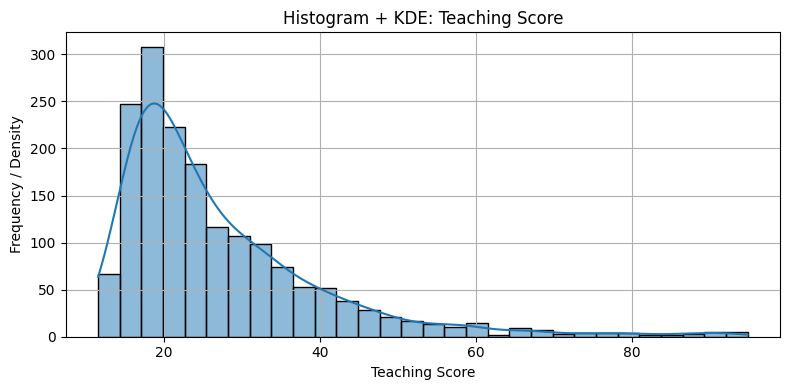

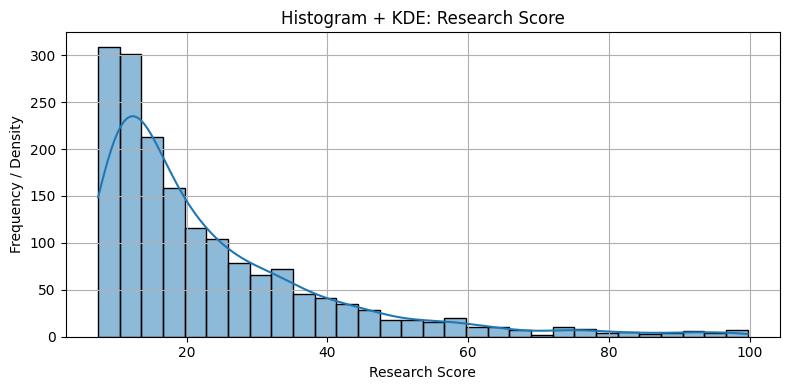

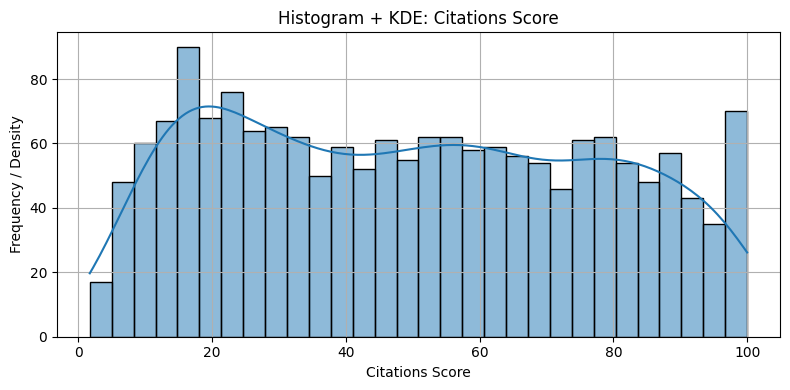

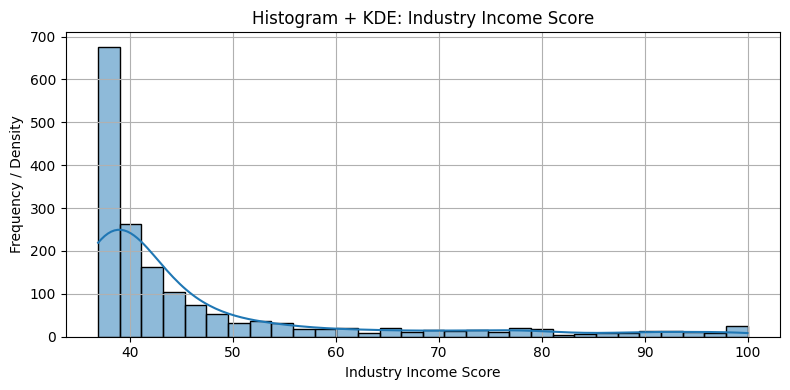

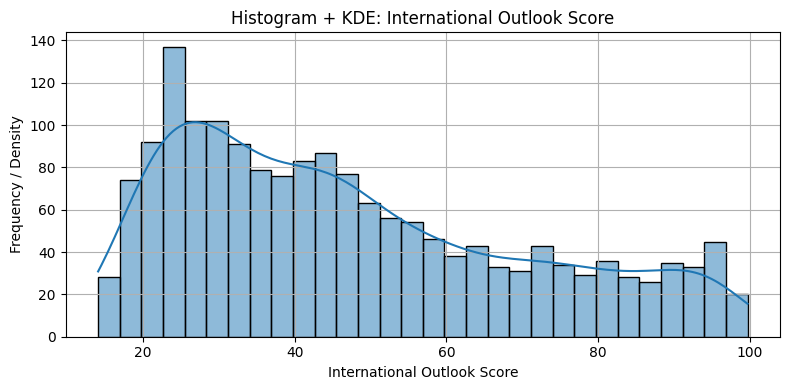

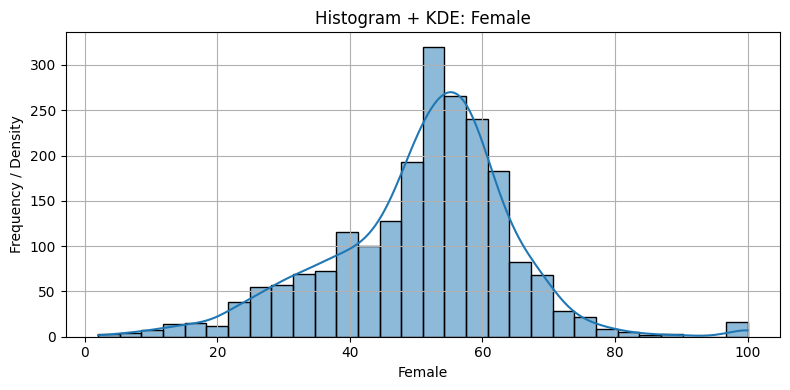

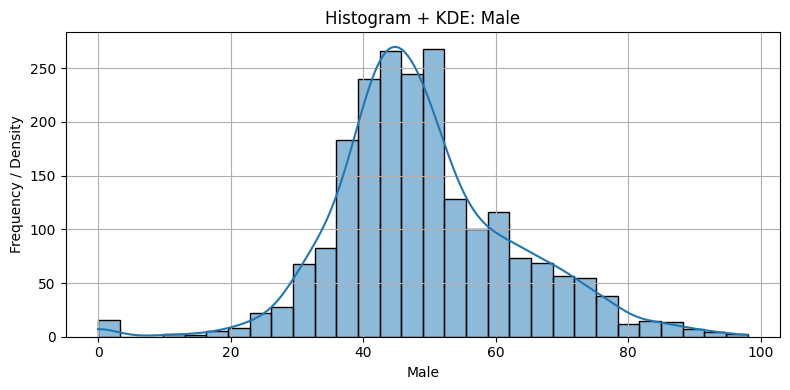

In [20]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram + KDE: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency / Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Emissions testing

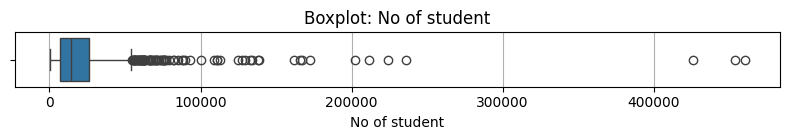

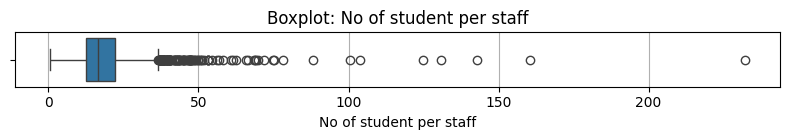

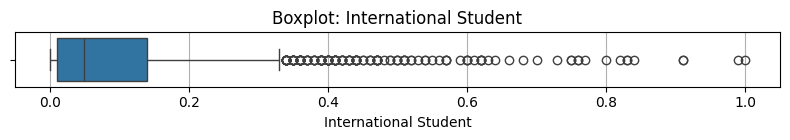

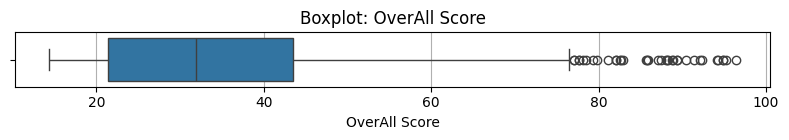

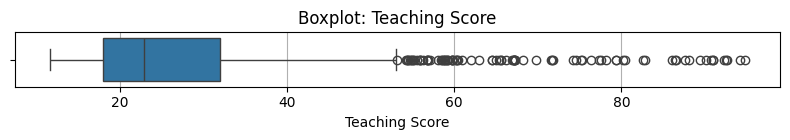

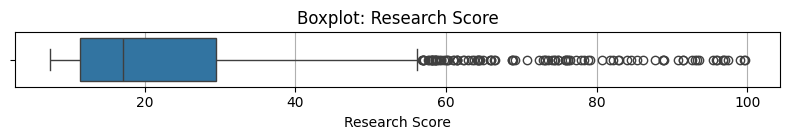

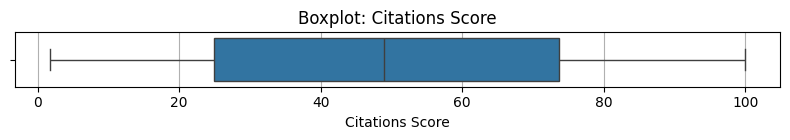

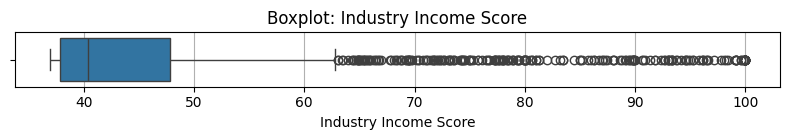

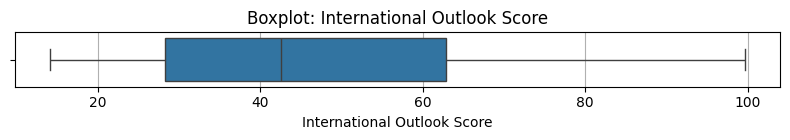

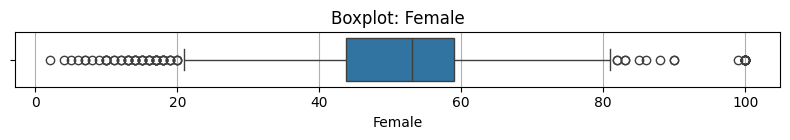

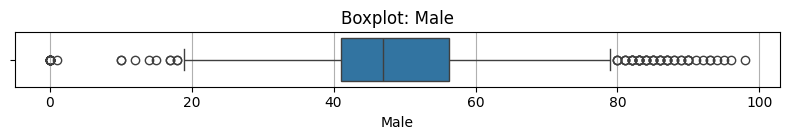

In [21]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

In [22]:
skew_kurt = df.select_dtypes(include=['float64', 'int64']).agg(['skew', 'kurtosis']).transpose()
skew_kurt.columns = ['Skewness', 'Kurtosis']
skew_kurt.sort_values(by='Skewness', key=abs, ascending=False, inplace=True)
skew_kurt

,Skewness,Kurtosis
No of student,8.523023,122.182299
No of student per staff,5.476483,65.133858
International Student,2.356902,7.390878
Teaching Score,2.045652,5.306750
Industry Income Score,2.025053,3.269288
Research Score,1.922467,4.080636
OverAll Score,0.946053,0.935285
International Outlook Score,0.646554,-0.671068
Female,-0.285142,1.263421
Male,0.285142,1.263421


Correlation analysis

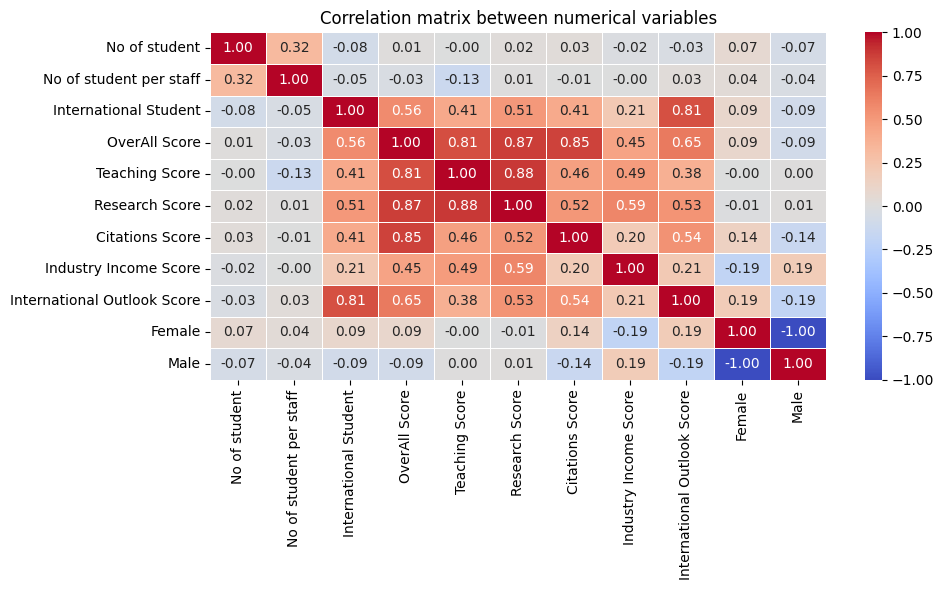

In [23]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix between numerical variables")
plt.tight_layout()
plt.show()

# Neuer Abschnitt

I chose the OverAll Score variable as the target variable. It is like a final score of the university, it is influenced by many variables. It has a great correlation with such variables as Research Score (0.87), Teaching Score (0.81), Citations Score (0.85), International Outlook Score (0.65)

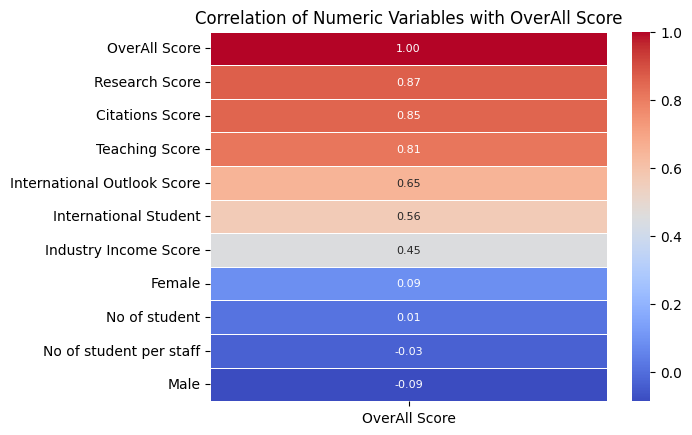

<Figure size 1500x1500 with 0 Axes>

In [24]:
num_columns = df.select_dtypes(['int', 'float'])
df_num_columns = num_columns.corr()
sale_price_corr = df_num_columns[["OverAll Score"]].sort_values(by="OverAll Score", ascending=False)
sns.heatmap(sale_price_corr, annot=True,  linewidths=.5, fmt=".2f", cmap="coolwarm", cbar=True, annot_kws={"size": 8})
plt.title("Correlation of Numeric Variables with OverAll Score")
plt.figure(figsize=(15, 15))
plt.show()

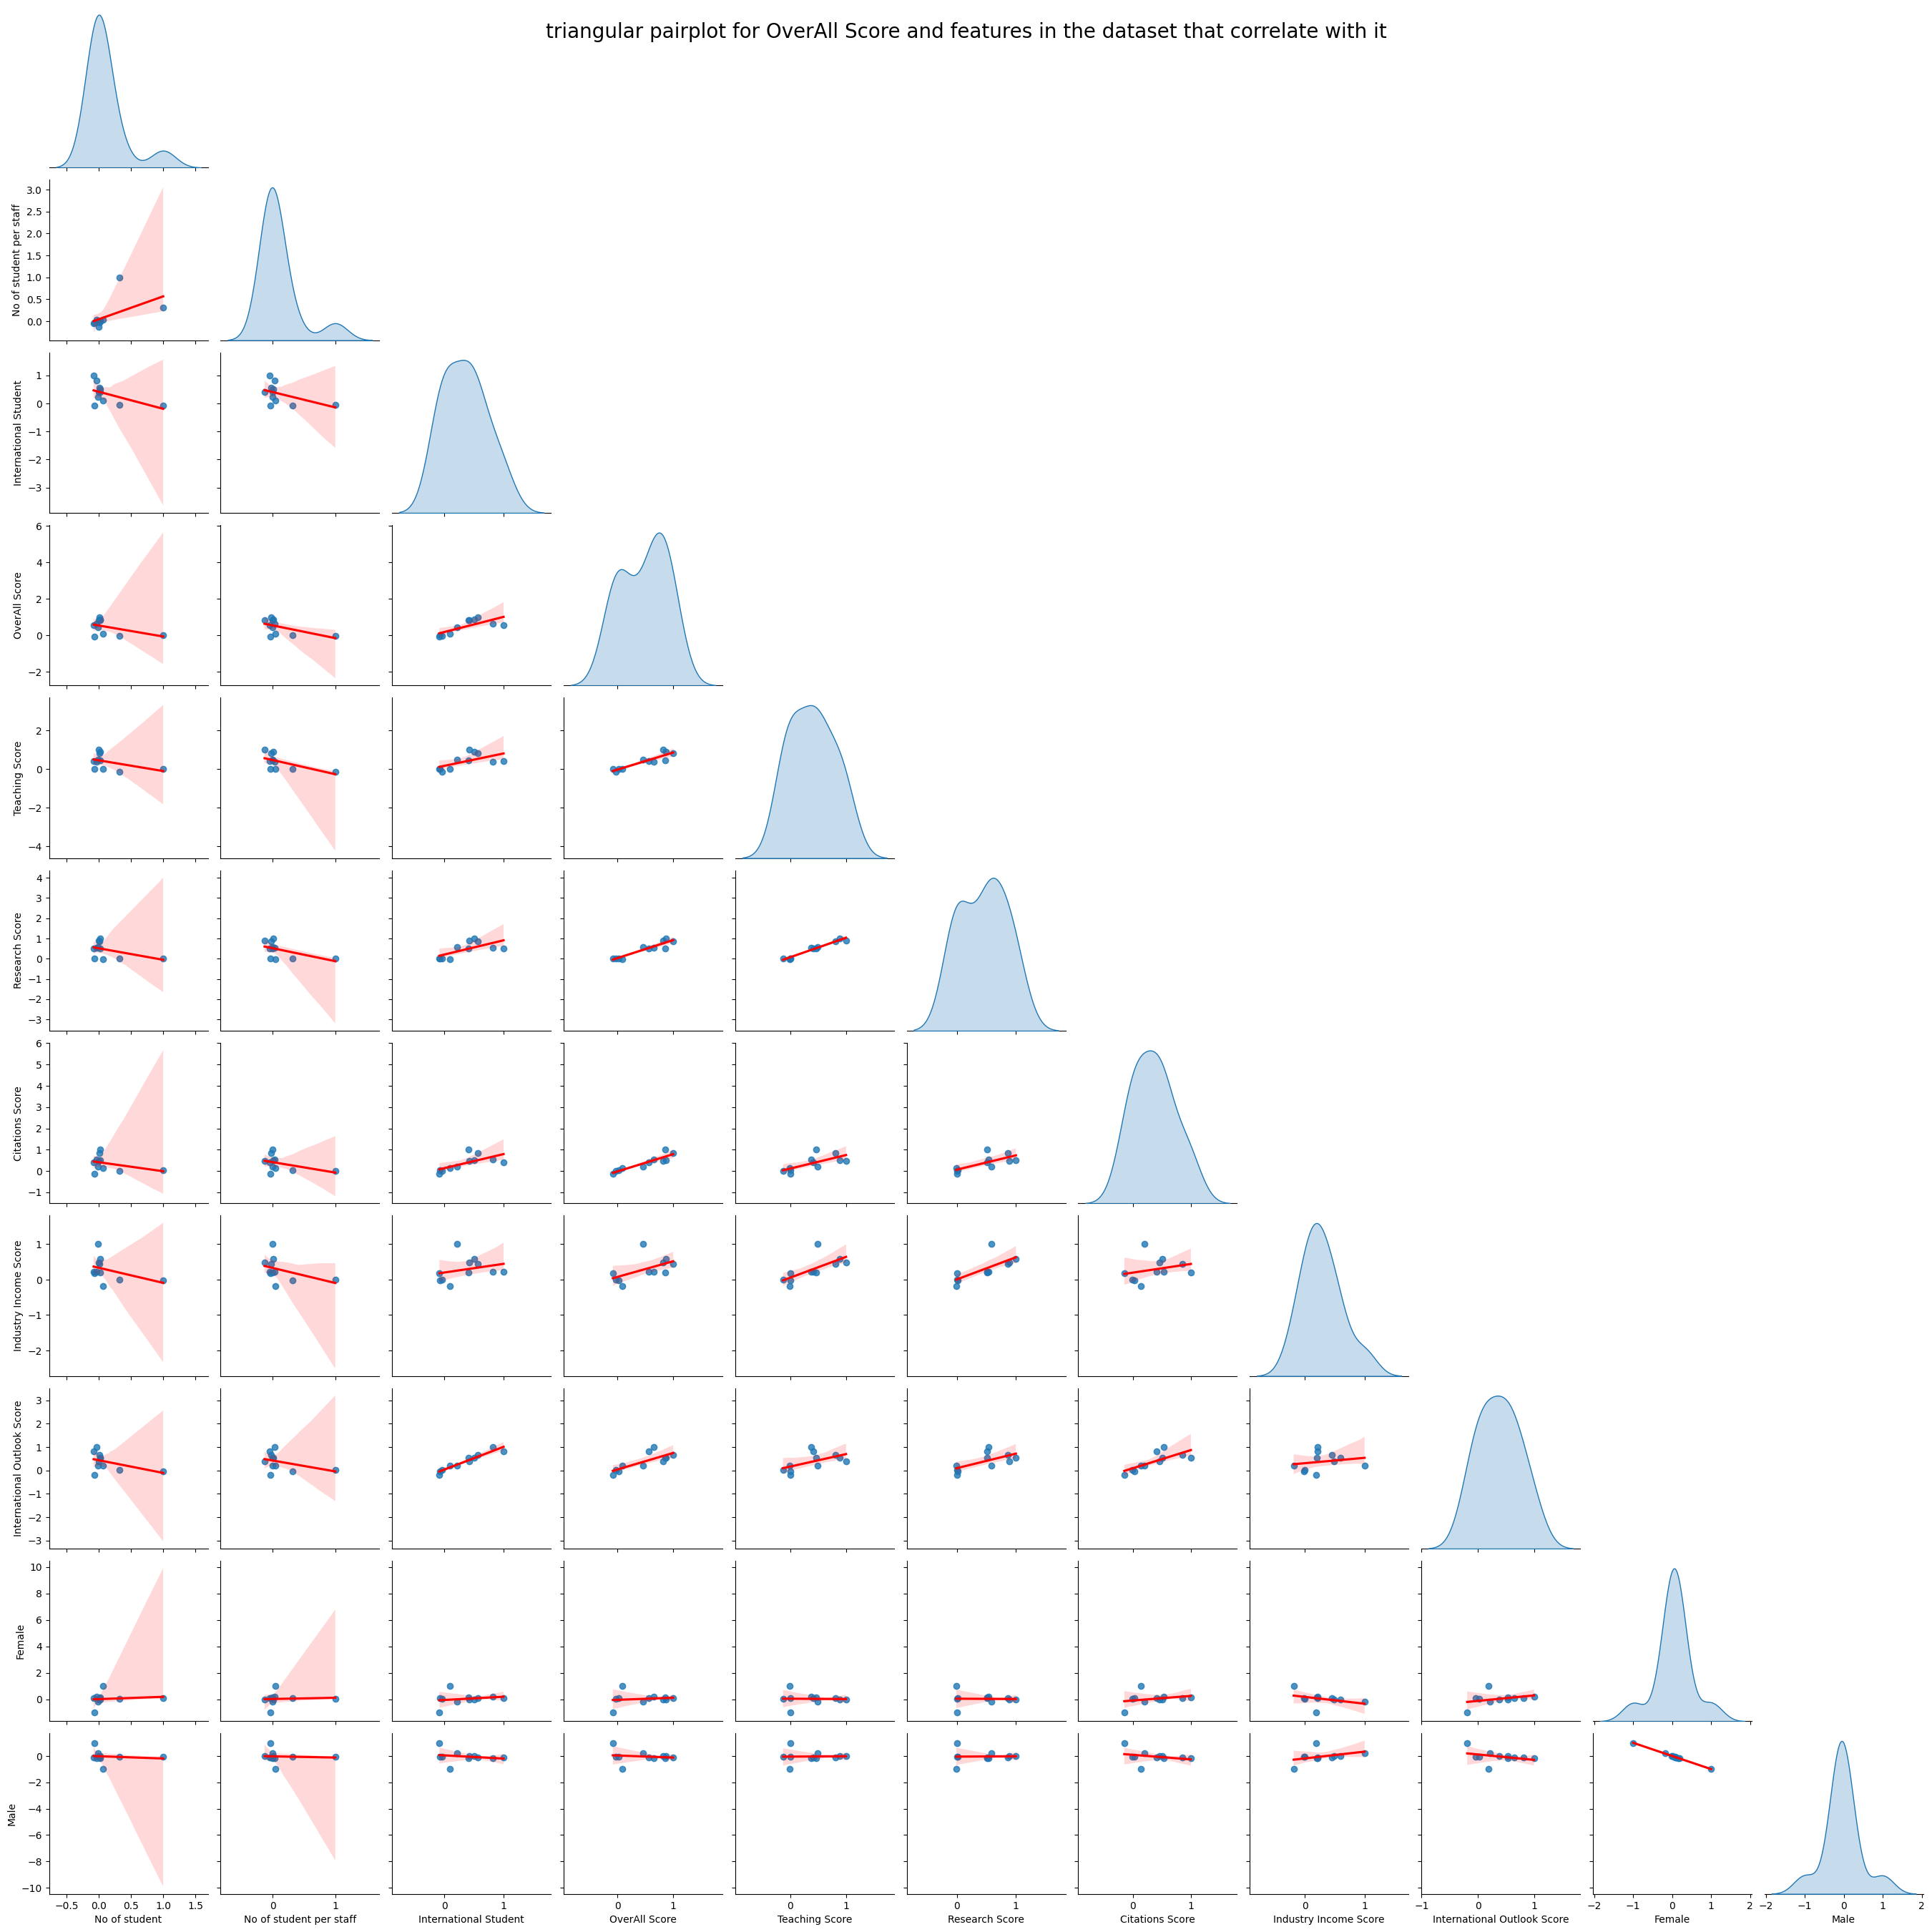

In [25]:
 g = sns.pairplot(
    df_num_columns,
    kind="reg",
    diag_kind="kde",
    corner=True,
    plot_kws={"line_kws": {"color": "red"}}
)
g.fig.suptitle("triangular pairplot for OverAll Score and features in the dataset that correlate with it", fontsize=20)
plt.show()

I chose to use regression for my dataset. The target variable is OverAll Score, and the features are Research Score, Teaching Score, Citations Score.

In [26]:
features = ['Research Score', 'Citations Score', 'Teaching Score']
target = 'OverAll Score'

df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

X.shape, y.shape, X_train.shape, X_val.shape, X_test.shape

((1721, 3), (1721,), (1032, 3), (344, 3), (345, 3))

In [27]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_val, y_train_val)

best_lasso_model = grid_search.best_estimator_

y_train_pred = best_lasso_model.predict(X_train_val)
y_val_pred = best_lasso_model.predict(X_val)
y_test_pred = best_lasso_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train_val, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train_val, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

grid_search.best_params_, train_rmse, val_rmse, test_rmse, train_r2, val_r2, test_r2

({'lasso__alpha': 0.01},
 np.float64(1.98848192398227),
 np.float64(2.135687260945002),
 np.float64(2.043002243375468),
 0.985208122933315,
 0.9848587623258505,
 0.982446610279052)

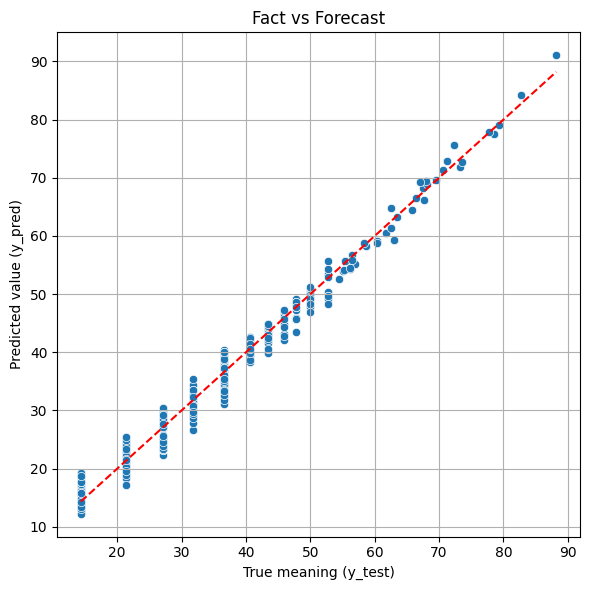

In [28]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('True meaning (y_test)')
plt.ylabel('Predicted value (y_pred)')
plt.title('Fact vs Forecast')
plt.grid(True)
plt.tight_layout()
plt.show()

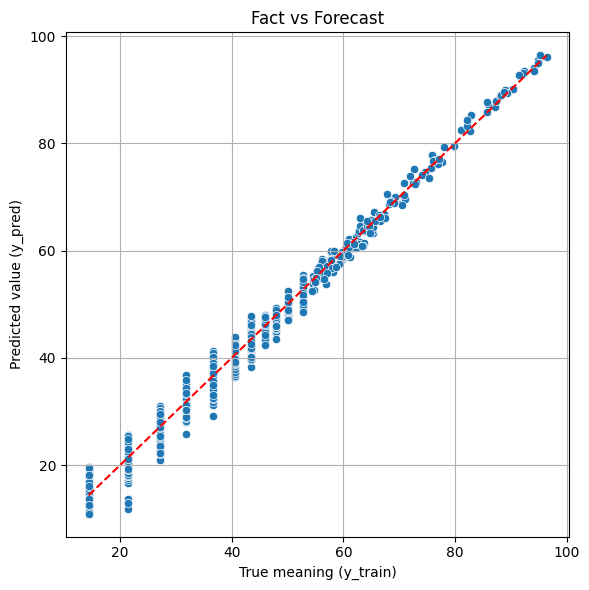

In [29]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_train_val, y=y_train_pred)
plt.plot([y_train_val.min(), y_train_val.max()], [y_train_val.min(), y_train_val.max()], '--r')
plt.xlabel('True meaning (y_train)')
plt.ylabel('Predicted value (y_pred)')
plt.title('Fact vs Forecast')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
all_universities = df_model.copy()
all_universities['University'] = df.loc[df_model.index, 'Name of University'].values

all_universities['Predicted OverAll Score'] = best_lasso_model.predict(df_model[features])
all_universities = all_universities[['University', 'OverAll Score', 'Predicted OverAll Score']]

all_universities

,University,OverAll Score,Predicted OverAll Score
0,University of Oxford,96.4,96.025151
1,Harvard University,95.2,96.429441
2,University of Cambridge,94.8,94.975444
3,Stanford University,94.8,95.537261
4,Massachusetts Institute of Technology,94.2,93.487901
...,...,...,...
2336,University of the West of Scotland,36.6,34.608096
2337,University of Windsor,36.6,34.024568
2338,University of Wolverhampton,36.6,35.095186
2339,University of Wuppertal,36.6,36.794415


In my research, I built a model that predicts the overall university rating (OverAll Score) based on three main indicators: Research Score, Teaching Score, and Citations Score.

To make the model more stable and reduce the risk of overfitting (when the model “remembers” the training data too well), I chose Lasso Regression. I also applied scaling (via StandardScaler) and selected the best alpha parameter using GridSearchCV with 5-fold cross-validation.

As a result, the best parameter was alpha = 0.01, which allowed to maintain high accuracy and at the same time make the model simpler.

After testing, the model showed excellent results:



*   R² (on test data): 0.982
*   RMSE: 2.04



This means that the model explains the variability of university ratings very well and gives accurate predictions.

So, as the final model, I chose Lasso Regression because it:


*   gives accurate predictions;
*   works well on both training and new data;

*   automatically removes less important features;
*   ready to be applied to new universities in the future.
